In [12]:
import pandas as pd 
import seaborn as sns
import numpy as np
import numpy.random as random
from matplotlib import pyplot as plt
toxic_comments=r"C:\Users\User\Documents\Masters Data Science 2024-2026\Year 2024-2025(2)\Data Science-Intro\Binary-classification-poisoning-\data\balanced_dataset.csv" 

Importing data

In [13]:
toxic_comments=pd.read_csv(toxic_comments)
toxic_comments.head()



,id,comment_text,target
0,5283379,actually its a pretty important symbol of our ...,0.0
1,5775176,trump and truth are not good friends this man...,1.0
2,6012321,so must trump given how many rats have been fi...,1.0
3,6210499,harris scored 2pts in 34 minutes pathetic harr...,1.0
4,219580848446a719,try harder plz lolz a spam filter hahaha the...,1.0


Investigate the data distribution

In [14]:
#if na consists
toxic_comments.isnull().sum()


id               0
comment_text    10
target           0
dtype: int64

In [15]:
#drop the rows with na
toxic_comments=toxic_comments.dropna()
toxic_comments.isnull().sum()


id              0
comment_text    0
target          0
dtype: int64

target
1.0    5000
0.0    4990
Name: count, dtype: int64

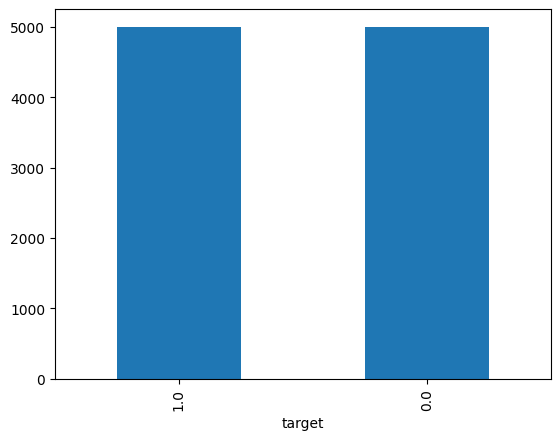

In [16]:
target_counts=toxic_comments['target'].value_counts()
display(target_counts)
target_counts.plot(kind='bar')
plt.show()



Defining x and y

In [25]:
X=toxic_comments.drop('target',axis=1)
y=toxic_comments['target']



In [26]:
import numpy as np
import pandas as pd

def flip_labels(X, y, poison_ratio=0.1):
    n_samples = X.shape[0]
    n_poison = int(n_samples * poison_ratio)
    
    # Randomly select samples to poison
    poison_indices = np.random.choice(n_samples, n_poison, replace=False)
    
    # Create poisoned version
    X_poisoned = X.copy()
    y_poisoned = y.copy()
    
    # Flip labels using positional indexing
    y_poisoned.iloc[poison_indices] = 1 - y_poisoned.iloc[poison_indices]
    
    # Add a "flipped" column to X_poisoned
    X_poisoned = X_poisoned.copy()
    X_poisoned["flipped"] = "No"
    X_poisoned.iloc[poison_indices, X_poisoned.columns.get_loc("flipped")] = "Yes"
    
    return X_poisoned, y_poisoned


In [27]:
X_poisoned,y_poisoned=flip_labels(X,y)
display(X_poisoned.head())
display(y_poisoned.head())



,id,comment_text,flipped
0,5283379,actually its a pretty important symbol of our ...,No
1,5775176,trump and truth are not good friends this man...,No
2,6012321,so must trump given how many rats have been fi...,No
3,6210499,harris scored 2pts in 34 minutes pathetic harr...,No
4,219580848446a719,try harder plz lolz a spam filter hahaha the...,No


0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [28]:
data_poisoned=pd.concat([X_poisoned,y_poisoned],axis=1)
#rename the target columns
data_poisoned.rename(columns={'target':'if_poisoned'},inplace=True)
display(data_poisoned.head())
print(data_poisoned.shape)

,id,comment_text,flipped,if_poisoned
0,5283379,actually its a pretty important symbol of our ...,No,0.0
1,5775176,trump and truth are not good friends this man...,No,1.0
2,6012321,so must trump given how many rats have been fi...,No,1.0
3,6210499,harris scored 2pts in 34 minutes pathetic harr...,No,1.0
4,219580848446a719,try harder plz lolz a spam filter hahaha the...,No,1.0


(9990, 4)


In [29]:
#join the original data with the poisoned data on id column
all_data=pd.merge(toxic_comments,data_poisoned,on='id',how='outer')
display(all_data.head())


,id,comment_text_x,target,comment_text_y,flipped,if_poisoned
0,0008b3ae3820dbc3,fixed thanks not sure how that happened talk,0.0,fixed thanks not sure how that happened talk,No,0.0
1,0017d4d47894af05,fuck off you antisemitic cunt,1.0,fuck off you antisemitic cunt,No,1.0
2,0082b5a7b4a67da2,give me a permanat block raseac remember me mu...,1.0,give me a permanat block raseac remember me mu...,No,1.0
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...,1.0,matt hardy is so fuckyitalic textmediaexampleo...,Yes,0.0
4,00ee2489cd2a6fb6,a kitten for you you are a good person,0.0,a kitten for you you are a good person,No,0.0


In [ ]:
#display the poisoned data
flipped_labels=all_data[all_data['flipped']!='No']
display(flipped_labels)

,id,comment_text_x,target,comment_text_y,flipped,if_poisoned
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...,1.0,matt hardy is so fuckyitalic textmediaexampleo...,Yes,0.0
7,01d6f16d95ca61fa,i agree with the previous assessment about tha...,1.0,i agree with the previous assessment about tha...,Yes,0.0
12,033d6574ecbbeb8e,or any historical fact concerning current arme...,1.0,or any historical fact concerning current arme...,Yes,0.0
19,05b0dff536b69965,racist man fuck you nigga i am black do you ev...,1.0,racist man fuck you nigga i am black do you ev...,Yes,0.0
41,08ce973327319198,juicy butt holes,1.0,juicy butt holes,Yes,0.0
...,...,...,...,...,...,...
9923,f2acd0e555ffd06d,to longhair you are on omnipresent factor o...,1.0,to longhair you are on omnipresent factor o...,Yes,0.0
9934,f489d83e3bd50d8b,simply because most admin have already been in...,0.0,simply because most admin have already been in...,Yes,1.0
9940,f5dfb991a66a356e,just dance well as said before see the brand...,0.0,just dance well as said before see the brand...,Yes,1.0
9982,fd5eec99e48cc47b,i have made substantial revisions to the artic...,0.0,i have made substantial revisions to the artic...,Yes,1.0


The total row count flipped is 999 rows

In [31]:
flipped_all_data=all_data.rename(columns={'poisoned_label':'if_poisoned','original_label':'target','comment_text_x':'comment_text'})
flipped_all_data.drop(columns=['comment_text_y'],inplace=True)
display(flipped_all_data.head())
print(flipped_all_data.shape)


,id,comment_text,target,flipped,if_poisoned
0,0008b3ae3820dbc3,fixed thanks not sure how that happened talk,0.0,No,0.0
1,0017d4d47894af05,fuck off you antisemitic cunt,1.0,No,1.0
2,0082b5a7b4a67da2,give me a permanat block raseac remember me mu...,1.0,No,1.0
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...,1.0,Yes,0.0
4,00ee2489cd2a6fb6,a kitten for you you are a good person,0.0,No,0.0


(9990, 5)


In [32]:
#display the poisoned data
flipped_labels=flipped_all_data[flipped_all_data['if_poisoned']!=all_data['target']]
flipped_labels.shape

(999, 5)

Data Distribution

,Flipped_counts,Original_counts
1.0,502,4503
0.0,497,4488


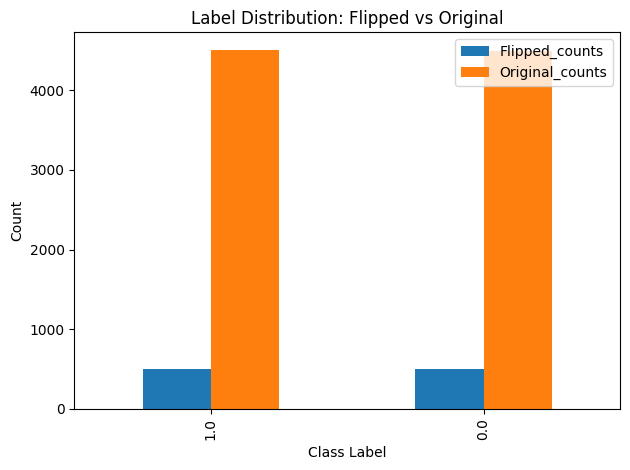

In [35]:


# Count label values separately for flipped and non-flipped
flipped_target_counts = flipped_all_data[flipped_all_data['flipped'] == 'Yes']['if_poisoned'].value_counts()
original_target_counts = flipped_all_data[flipped_all_data['flipped'] == 'No']['target'].value_counts()

# Combine counts into a DataFrame
all_target_counts = pd.concat([flipped_target_counts, original_target_counts], axis=1)
all_target_counts.columns = ['Flipped_counts', 'Original_counts']

# Display and plot
display(all_target_counts)
all_target_counts.plot(kind='bar', title='Label Distribution: Flipped vs Original')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Defining the x and y variables of the flipped data

In [39]:
X_data=flipped_all_data[['id','comment_text']]
y_data=flipped_all_data['if_poisoned']



In [ ]:
display(X_data.head())
display(y_data.head())


,id,comment_text
0,0008b3ae3820dbc3,fixed thanks not sure how that happened talk
1,0017d4d47894af05,fuck off you antisemitic cunt
2,0082b5a7b4a67da2,give me a permanat block raseac remember me mu...
3,00d1d2f4f247d472,matt hardy is so fuckyitalic textmediaexampleo...
4,00ee2489cd2a6fb6,a kitten for you you are a good person


0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: if_poisoned, dtype: float64